# Impacto Profundo en el ML
Deep Learning es un conjunto de técnicas de *Machine Learing* basadas en lo que se conoce como Redes Neuronales Artificiales. Algunas características del Deep Learning son:
* Se basa en Redes Neuronales Artificiales con muchas capas.
* Utiliza aprendizaje por gradiente.
* Reducen el esfuerzo necesario para extraer características  de los datos originales.
* Funciona mejor cuando mayor cantidad de datos hay disponibles.

## Aprendizaje con métodos basados en el gradiente
El método más común de entrenar redes neuronales son los métodos basados en gradiente. Consideremos el siguiente conjunto de datos generados, donde $x$ es la variable que conocemos e $y$ la que se quiere predecir.

$$y=3 * x+(rand-0.5)$$




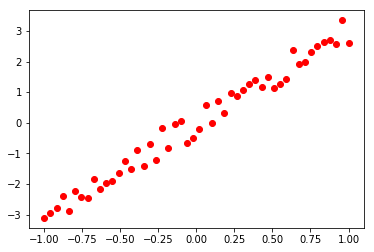

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def gen_random_data(mult):
    _x = np.linspace(-1, 1, 50)
    _error = (np.random.rand(*_x.shape) - .5)
    _y = _x * mult + _error
    return _x, _y


x, y = gen_random_data(3)
plt.plot(x, y, 'ro')
plt.show()

## Objetivo
Considerando la varaible independiente $x$ y la variable dependiente $y$, el objetivo de un regresión lineal es encontrar $w$ y $b$ tal que dada una función de error $E(y, \hat{y})$ sea mínimo. Es decir:

$$\underset{w,b}{arg\,min}=E(y,xw+b)$$

## Función de error
Una función de error utilizada para este tipo de problemas es el error medio cuadrático (_mean squared error_), que se define como:

$$MSE(y,\hat{y})=\frac{1}{N}\sum(y-\hat{y})^{2}$$

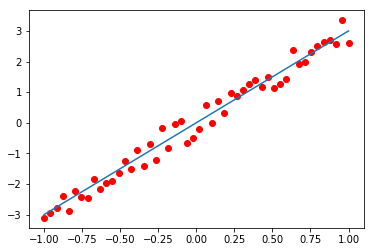

In [2]:
#Función de predicción
def lineal(x, w, b):
    return x * w + b


plt.plot(x, y, 'ro', x, lineal(x, 3, 0))
plt.show()

In [3]:
#Función de error
def mse(y_true, y_pred):
    return np.average((y_true - y_pred) ** 2)

print('El MSE es {}'.format(mse(y, lineal(x, 3, 0))))

El MSE es 0.0787613990695745


## Optimización
El problema en la regresión lineal es encontrar los parámetros que minimiza el valor de la función de error. A continuación, se presenta un gráfico mostrando el valor de la función de $mse$ para diversos valores de $w$ y $b$.

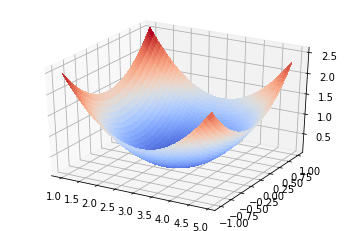

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# Construyendo datos
w = np.arange(1, 5, 0.1)
b = np.arange(-1, 1, 0.01)
w, b = np.meshgrid(w, b)
e = np.empty_like(w)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        e[i, j] = mse(y, lineal(x, w[i, j], b[i, j]))


# Plot the surface.
surf = ax.plot_surface(w, b, e, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


plt.show()

Obviamente, calculando el error para diversos valores de $w$ y $b$ se puede seleccionar el mínimo. Sin embargo, esto es impracticable cuando existen muchos parámetros o puntos de datos.
Por simplicidad, vamos a suponer que se conoce $b=0$ resultando en que $\hat{y}=xw$, por simplicidad la llamaremos $h(x)$. Entonces, nuestro único problema sería encontrar $w$. En este caso, si graficamos la curva de error obtendríamos lo siguiente.

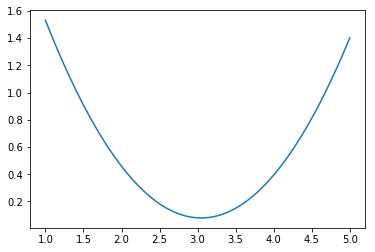

In [5]:
def exp_error(y, x, ws):
    def single_error(w):
        return mse(y, lineal(x, w, 0))
    _s = np.vectorize(single_error)
    return _s(ws)

ws = np.linspace(1, 5, 51)
plt.plot(ws, exp_error(y, x, ws))
plt.show()

## Solución
Dado que la función de error tiene un solo mínimo, se podrían tomar 2 valores cercanos de manera de conocer en qué dirección es conveniente explorar. La función lineal en realidad es una función que depende no solo de los datos $x$, sino que también del parámetro a aprender $w$, entonces la notaremos como $h(x,w)$. Para conocer la pendiente de la función de error dado el parámetro a conocer debemos hacer:

$$pendiente_w(w_{1}, w_{0})=\frac{MSE(y,h(x,w_{1}))-MSE(y,h(x,w_{0}))}{w_{1}-w_{0}}$$ 

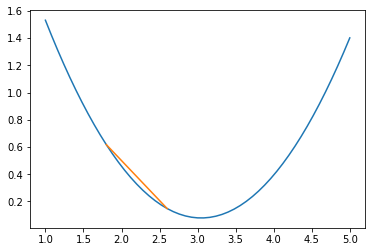

In [6]:
errors = exp_error(y, x, ws)
pendiente = (errors[10]-errors[20])/(ws[10]-ws[20])
correccion_ordenada_origen = -pendiente*ws[10] + errors[10]
plt.plot(ws, errors, ws[10:21], lineal(pendiente, ws[10:21], 0)+correccion_ordenada_origen)
plt.show()

Entonces, se podría inicializar $w$ de forma aleatoria e ir actualizando el valor en contra de la pendiente.
```
for i in range(ciclos):
    pw, pb = pendiente(w, b)
    w = w - lr * pw
    b = b - lr * pb
```

`lr` y `ciclos` son lo que se conocen como hiperparámetros del algoritmo y dependiendo su selección será cuan bien y rápido el algoritmo llegue a un resultado. 
Por ejemplo, si `lr` es muy pequeño el algoritmo tardará mucho en ajustar los parámetros. Sin embargo, si `lr` es muy grande el algoritmo rebotará entre valores de error muy alto.

Errores a medida que se actualiza el valor de w


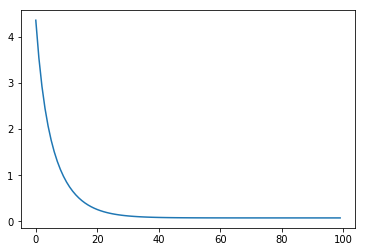

El w final es 3.044429728538134
El b final es -0.029066100768916137


In [7]:
def pendiente(y_true, x, w, b, delta=1e-6):
    pw = (mse(y_true, lineal(x, w + delta, b))-mse(y_true, lineal(x, w, b))) / delta
    pb = (mse(y_true, lineal(x, w, b + delta))-mse(y_true, lineal(x, w, b))) / delta
    return pw, pb

w = 0 #Podría ser cualquier valor
b = 1 
ciclos = 100
lr = 0.1 ## Valores pequeños y grandes: 0.01 y 10
errors = []
for i in range(ciclos):
    pw, pb = pendiente(y, x, w, b)
    errors.append(mse(y, lineal(x, w, b)))
    w = w - lr * pw
    b = b - lr * pb
print('Errores a medida que se actualiza el valor de w')
plt.plot(errors)
plt.show()
print('El w final es {}'.format(w))
print('El b final es {}'.format(b))

## Gradient Descent

Cuando consideramos la pendiente entre dos puntos muy cercanos, en realidad podemos considerar que la pendiente es la derivada para esa variable en ese punto.

$$\lim_{\Delta \rightarrow 0} pendiente_w(w_{0}+\Delta,w_{0})= \lim_{\Delta \rightarrow 0} \frac{MSE(y,h(x,w_{0}+\Delta, b))-MSE(y,h(x,w_{0}, b))}{\Delta} =\frac{dMSE(y,h(x,w,b))}{dw}$$

$$\lim_{\Delta \rightarrow 0} pendiente_b(b_{0}+\Delta,b_{0})= \lim_{\Delta \rightarrow 0} \frac{MSE(y,h(x,w, b_{0}+\Delta))-MSE(y,h(x,w,b_{0}))}{\Delta} =\frac{dMSE(y,h(x,w,b))}{db}$$

Cuando generalizamos esto para todas las variables que se desean optimizar, en realidad trabajamos sobre el gradiente:

$$\nabla MSE(w,b)=(\frac{dMSE(w,b)}{dw},\frac{dMSE(w,b)}{db})$$

Utilizar el gradiente tiene dos ventajas:
 1. Reduce la cantidad de computo.
 2. Reduce errores de precisión de punto flotante.
 
 Con esto, el algoritmo anterior se transforma en:

Valores iniciales. w=-4.301187201473645 b=-12.209548403416846
Errores a medida que se actualiza el valor de w


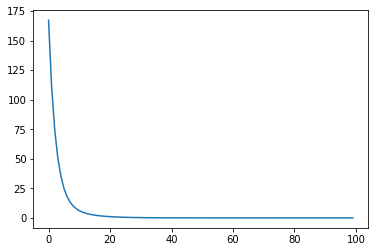

El w final es 3.0411908279300226
El b final es -0.029065603463734116


In [8]:
def gradiente(y_true, x, w, b):
    gw = -2 * np.average((y_true -lineal(w, x, b) ) * x)
    gb = -2 * np.average((y_true -lineal(w, x, b) ))
    return gw, gb
  
w = np.random.uniform(-50, 50) #genera un flotante aleatorio
b = np.random.uniform(-50, 50) #genera un flotante aleatorio
print('Valores iniciales. w={} b={}'.format(w, b))
ciclos = 100
lr = 0.1
errors = []
for i in range(ciclos):
    pw, pb = gradiente(y, x, w, b)
    errors.append(mse(y, lineal(x, w, b)))
    w = w - lr * pw
    b = b - lr * pb
print('Errores a medida que se actualiza el valor de w')
plt.plot(errors)
plt.show()
print('El w final es {}'.format(w))
print('El b final es {}'.format(b))

En el caso general,  una instancia puede tener muchas características, por lo tanto $\bar{x}=(x_1, x_2, ..., x_m)$ y $\bar{w}=(w_1, w_2, ..., w_m)$ es un vectores y la fórmula de la regresión lineal es:

$$f(x)=x_1 * w_1+ x_2 * w_2 + ... + x_m * w_m +b$$

Si consideramos el producto interno entre los vectores, se puede expresar como:

$$f(x)=\bar{x} \cdot \bar{w} +b$$

Para acelerar la computación, se suele calcular sobre muchas instancias, con lo que:

$$ X = \left[\begin{array}{c}
\bar{x}_1^T\\
\bar{x}_2^T\\
...\\
\bar{x}_n^T\\
\end{array}\right] =
\left[\begin{array}{cccc}
x_{1, 1} & x_{1, 2} & ... & x_{1, m}\\
x_{2, 1} & x_{2, 2} & ... & x_{2, m}\\
... & ... & ... & ...\\
x_{n, 1} & x_{n, 2} & ... & x_{n, m}\\
\end{array}\right]$$

En este caso, el producto interno sigue funcionando, ya que el vector se comporta como una matriz de $(m, 1)$.

# Regresión logística
Lo anterior se conoce como regresión lineal, que sirve para cuando se quiere predecir un valor en un continuo. Sin embargo, no funciona muy bien cuando queremos resolver problemas de clasificación. 

La regresión logística (_Logistic Regression_) es un tipo de regresión cuyo objetivo es determinar la probabilidad de que una instancia pertesca a una clase $y$, dado un conjunto de variables independientes $x_i$ que la definen. En este contexto, las instancias están representadas como un vector de variables independientes $x=\mathbb{R}^{n}$ y una clase $y=\{0,1\}$. Es decir:

$$P(y|\bar{x})=h(\bar{x})$$

En este contexto, la función seleccionada para hacer esta estimación por excelencia es la sigmoide.

$$sigmoid(z)=\frac{1}{1+e^{-z}}$$

donde: 

$$z=\bar{x} \cdot \bar{w}+b$$


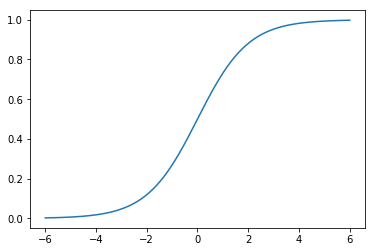

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-6, 6, 250)
plt.plot(x, sigmoid(x))
plt.show()

Además de que la imagen de esta función está en $(0, 1)$, la derivada de esta función es:
$$\frac{sigmoid(z)}{dz}=sigmoid(z)(1-sigmoid(z))$$
Lo que facilitaba su implementación.

En este contexto, $z$ es una combinación lineal de las variables $x$.


## Función de error
Para calcular el error, se utiliza la entropía cruzada entre el valor esperado y el valor obtenido.
$$CE(y,\hat{y})=\frac{\sum(-y*log(\hat{y})-(1-y)*log(1-\hat{y}))}{N}$$
En este contexto, la entropía cruzada se interpreta como la información promedio (en bits) necesaria para determinar el valor de $y$ dado que se conoce el valor de $\hat{y}$.

__Nota__: Por simplicidad, se interpreta el logaritmo como logaritmo natural, pero se puede usar logaritmo en cualquier base, ya que solo afecta en una constante.

## Ejemplo
Para el ejemplo de regresión logística se utilizará el conjunto de datos de cáncer de pecho provisto. Este conjuntos de datos fue recolectado por investigadores de la Universidad de Wisconsin y provisto por la [UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Para acceder al conjunto de datos, no es necesario descargarlo y convertirlo al formato, ya que en encuentra provisto por el módulo de [_sklearn.datasets_](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) de la librería sickit-learn, que es una librería de _machine learning_ que se utilizará durante el curso.

El dataset tiene 569 instancias, con 30 atributos cada una. Las instancias pueden ser clasificadas entre Malignos y Benignos. El dataset está ligeramente desbalanceado, lo que significa que existen más instancias de una clase que de la otra. En particular, 37,25% de las instancias son Malignas y 62,75% son Benignas. La siguiente tabla resume el conjunto de datos:

| Propiedad | Valor |
| --- | --- |
| Clases | 2 |
| Ejemplos por clase | 212(M-0), 357(B-1) | 
| Total de instancias | 569 |
| Dimensionalidad | 30|

El siguiente código:
1. Levanta los datos divididos en `x` (atributos) e `y` (clase).
1. Divide los datos en entrenamiento y testing.
1. Escala los datos de entrenamiento a valores entre 0 y 1.
1. Aplica las correcciones de escalado al conjunto de testing.

El conjuto de datos tiene 569 instancias con 30 caracteristicas.
Se dividio en 500 instancias de entrenamiento y 69 de test
Si utilizamos T-SNE para visualizar el conjunto de entrenamiento...


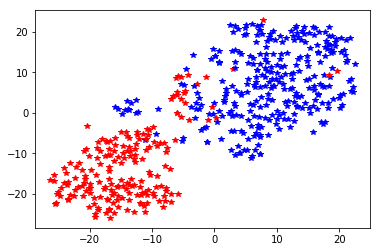

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix


x, y = load_breast_cancer(True)
x_train = x[:500,:]
y_train = y[:500]
x_test = x[500:,:]
y_test = y[500:]

maxs = np.max(x_train, axis=0)
mins = np.min(x_train, axis=0)
x_train = (x_train - mins) / (maxs - mins)
x_test = (x_test - mins) / (maxs - mins)

print('El conjuto de datos tiene {} instancias con {} caracteristicas.'.format(*x.shape))
print('Se dividio en {} instancias de entrenamiento y {} de test'.format(x_train.shape[0], x_test.shape[0]))


print('Si utilizamos T-SNE para visualizar el conjunto de entrenamiento...')
from sklearn.manifold import TSNE

ts_rep = TSNE().fit_transform(x_train)
for point, label in zip(ts_rep, y_train):
    rep = 'b*' if label == 1 else 'r*'
    plt.plot([point[0]], [point[1]], rep)
plt.show()

Implementar los gradientes es una tarea compleja y propensa a errores, pero frameworks como [Tensorflow](https://www.tensorflow.org) proveen funcionalidad para derivar los gradientes desde las funciones definidas.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Error: 0.7302493453025818


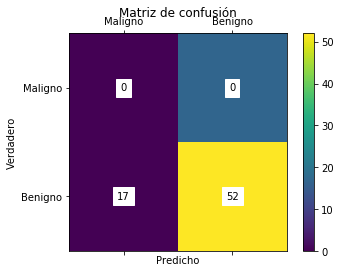

Entrenando
Error en entrenamiento


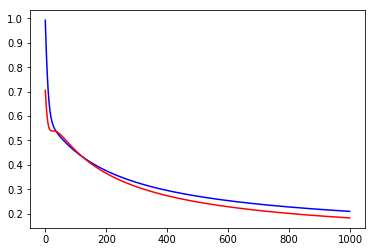

Error: 0.18259312212467194


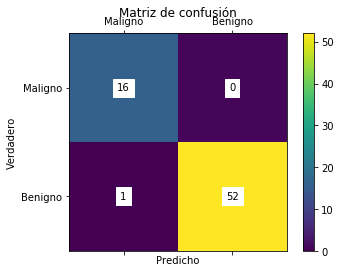

El w final es [-1.0748155   0.22850315 -0.6354531  -0.6474794  -1.2234676  -0.30234766
 -1.4794618  -1.8747087   0.92054033  0.5675748  -2.166785   -0.5734613
  1.136794   -1.740228   -1.5916739   0.4131217   0.44978926  1.4557567
  0.21132699  0.9527935  -0.7243215  -0.7300539  -2.708563   -0.9461127
  0.5943517  -0.26248035 -2.1248484  -1.8847084  -0.3781981  -0.22102696]
El b final es 4.526423454284668


In [11]:
import tensorflow as tf

'''Esta función dibuja bonita la matríz de confunsión.
'''
def show_confusion_matrix(cm, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Matriz de confusión')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicho')
    plt.ylabel('Verdadero')
    for i, row in zip(range(len(cm)), cm):
        for j, val in zip(range(len(row)), row):
            ax.text(i, j, str(val), va='center', ha='center').set_backgroundcolor('white')
    plt.show()

rng = np.random
ciclos = 1000
learning_rate = 0.1

# Placeholder de las entradas
X = tf.placeholder(tf.float32, [None, 30])
Y = tf.placeholder(tf.float32, [None])

W = tf.Variable(rng.randn(30).astype(np.float32), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Modelo logístico
logreg = tf.add(tf.reduce_sum(tf.matmul(X, tf.expand_dims(W, axis=1)), axis=1), b)
logreg = 1.0 / tf.add(1.0, tf.exp(-logreg))
# Error de entropía cruzada
cost = tf.reduce_mean(-Y * tf.log(logreg) - (1 - Y) * tf.log(1 - logreg))
# Gradient descent
# minimize() sabe que hay que modificar W y b porque están configuradas como trainable=True por defecto
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializa las variables
init = tf.global_variables_initializer()

# Comenzar una sessión
with tf.Session() as sess:

    # Inicializar
    sess.run(init)

    y_pred = sess.run(logreg, feed_dict={X: x_test, Y:y_test})
    print('Error: {}'.format(sess.run(cost, feed_dict={X: x_test, Y:y_test})))
    show_confusion_matrix(confusion_matrix(y_test, y_pred > 0.5), labels=['Maligno', 'Benigno'])
    errors = []
    errors_test = []
    print('Entrenando')
    for epoch in range(ciclos):
        sess.run(optimizer, feed_dict={X: x_train, Y: y_train})
        errors.append(sess.run(cost, feed_dict={X: x_train, Y:y_train}))
        errors_test.append(sess.run(cost, feed_dict={X: x_test, Y:y_test}))
    print('Error en entrenamiento')
    plt.plot(range(ciclos), errors, 'b-', range(ciclos), errors_test, 'r-')
    plt.show()
    y_pred = sess.run(logreg, feed_dict={X: x_test, Y:y_test})
    print('Error: {}'.format(sess.run(cost, feed_dict={X: x_test, Y:y_test})))
    show_confusion_matrix(confusion_matrix(y_test, y_pred > 0.5), labels=['Maligno', 'Benigno'])
    print('El w final es {}'.format(sess.run(W)))
    print('El b final es {}'.format(sess.run(b)))

## Keras

De hecho, este tipo de operaciones es tan común que frameworks de más alto nivel, como [Keras](https://keras.io/) ya lo traen implementado.

Es más, elementos como regresiones lineales o logísticas son considerados como neuronas en una red neuronal ([Imagen de Wikipedia](https://commons.wikimedia.org/wiki/File:Artificial_neural_network.png)):
![Esquema básido de una neurona](https://upload.wikimedia.org/wikipedia/commons/b/b6/Artificial_neural_network.png)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


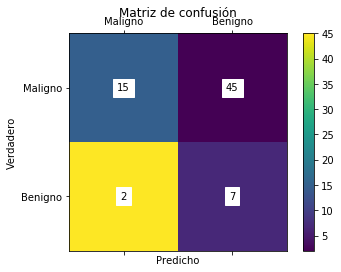

El w final es [-0.2375809   0.08231539 -0.30155092  0.25273335 -0.08759338 -0.02814245
  0.02215219 -0.31921715 -0.29625165 -0.02620378  0.2592743   0.11826235
  0.08548856  0.23631012 -0.38984317  0.06090248 -0.3040645  -0.22267957
  0.3229894   0.12586635 -0.05410415  0.2017029   0.0076746  -0.18059573
 -0.36240873  0.20695913  0.42737436  0.28945148 -0.13440242  0.33867598]
El b final es [0.]


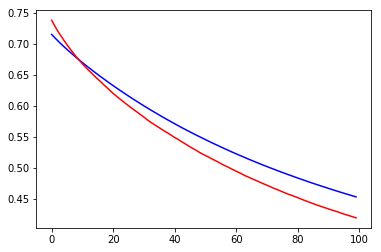

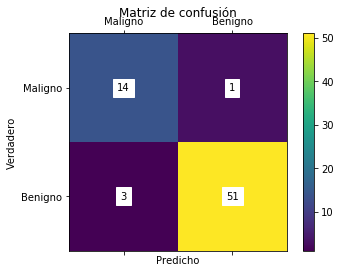

El w final es [-0.48349547  0.05855601 -0.57359767 -0.06029578  0.04479271 -0.29250404
 -0.4777337  -0.8883306  -0.14743774  0.28508493  0.06143771  0.33262688
 -0.09521934  0.04993423 -0.13830405  0.04011844 -0.30978605 -0.21407087
  0.5448793   0.20253266 -0.44498733  0.12914784 -0.3845017  -0.55304384
 -0.28579706 -0.08852272  0.03261165 -0.28999695 -0.13355859  0.30075046]
El b final es [1.327394]


In [12]:
from keras.layers import Dense, Input
from keras.models import Model
from keras import backend as K

#Defino la entrada que tiene forma  (None, 30)
i = Input((x_train.shape[1],))
#Defino una capa densa que es activation(x*w+b) 
#* es producto interno
#el kernel (w) tiene la forma (30, 1)
#el bias (b) tiene la forma (1,)
d = Dense(1, activation='sigmoid')(i)
model = Model(inputs=i, outputs=d)
model.compile(loss='binary_crossentropy', optimizer='sgd')

#imprimo el modelo
model.summary()

show_confusion_matrix(confusion_matrix(y_test, model.predict(x_test) > 0.5), labels=['Maligno', 'Benigno'])
#Por formato remuevo la última dimensión que es 1
print('El w final es {}'.format(K.get_value(model.layers[-1].kernel)[:, 0])) 
print('El b final es {}'.format(K.get_value(model.layers[-1].bias)))

h = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=0)
plt.plot(h.history['loss'], 'b-', h.history['val_loss'], 'r-')
plt.show()

show_confusion_matrix(confusion_matrix(y_test, model.predict(x_test) > 0.5), labels=['Maligno', 'Benigno'])
#Por formato remuevo la última dimensión que es 1
print('El w final es {}'.format(K.get_value(model.layers[-1].kernel)[:, 0]))
print('El b final es {}'.format(K.get_value(model.layers[-1].bias)))

## Problema de OCR de dígitos
Para este trabajo utilizaremos el conjunto de datos conocido como [MNIST](http://yann.lecun.com/exdb/mnist/). Este conjunto de datos ya se encuentra dividido entre entrenamiento y testing. El problema consiste en clasificar imágenes de dígitos escritos a mano al dígito correspondiente.

| Propiedad | Valor |
| --- | --- |
| Clases | 10 |
| Tamaño de las imagenes | 28 X 28 |
| Instancias de entrenemiento | 60.000 |
| Instancias de testeo | 10.000 |
| Valor mínimo de cada pixel | 0 |
| Valor máximo de cada pixel | 255 |

A continuación, se carga el dataset y se dibujan los primeros 100 ejemplos del conjunto de entrenamiento.

100 primeros elementos del conjunto de entrenamiento


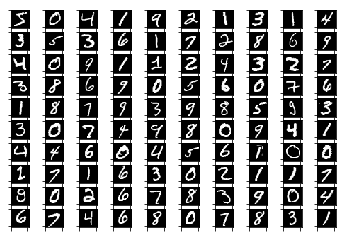

In [13]:
from keras.datasets import mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('100 primeros elementos del conjunto de entrenamiento')
f = plt.figure(111)
for i in range(10):
    for j in range(10):
        ax = f.add_subplot(10, 10, i + j*10 + 1)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        ax.imshow(x_train[i + j*10, :, :], cmap='gray')
plt.show()

size = x_train.shape[1]*x_train.shape[2]
x_train = x_train.reshape((x_train.shape[0], size)) / 255
x_test = x_test.reshape((x_test.shape[0], size)) / 255

Esto es un problema multiclase, que se podría pensar como una competencia entre 10 clasificadores que consideren cada uno de los $784$ pixeles de la imagen como sus características. Es decir, un clasificador para la clase 0, otro para la clase 1, otro para la clase 2, hasta llegar al 9. A la hora de entrenar, cada regresión logística se entrena por separado. Mientras que cuando se clasifica, la clase seleccionada es el clasificador que obtuvo la máxima probabilidad. 

Para acelerar el cálculo de los 10 clasificadores, se pueden unir los 10 vectores de peso $\bar{w}_c$ en una matriz, y los biases $b_c$ en un vector. Entonces:

$$W=\left[\begin{array}{cccc}
\bar{w}_0 & \bar{w}_1 & ... & \bar{w}_9\\
\end{array}\right]=$\left[\begin{array}{cccc}
w_{1,0} & w_{1,1} & ... & w_{1,9}\\
w_{2,0} & w_{2,1} & ... & w_{2,9}\\
...\\
w_{784,0} & w_{784,1} & ... & w_{784,9}\\
\end{array}\right]$$

$$\bar{b}=(b_0, b_1, ..., b_9)$$

Con esta definición, es fácil mostrar que:

$$f(X) = X \cdot W + \bar{b} =\left[\begin{array}{cccc}
X \cdot \bar{w_0} + b_0 & X \cdot \bar{w_1} + b_1 & ... & X \cdot \bar{w_9} + b_9 
\end{array}\right]$$

Con lo que cada columna de la matriz resultante, representa la salida de un clasificado para cada instancia.
Por lo tanto, en este ejemplo, es necesario transformar las etiquetas a la codificación one-hot con el fin de que el formato de las etiquetas sea compatible con el formato de salida de los clasificadores. 

In [14]:
print('El las etiquetas en el conjunto de entrenamiento tienen la forma {}'.format(y_train.shape))
print('Las primeras 10 estiquetas son {}'.format(y_train[:10]))
print('Transformadas a categoricas tienen la siguiente forma:')
print(to_categorical(y_train[:10]))

El las etiquetas en el conjunto de entrenamiento tienen la forma (60000,)
Las primeras 10 estiquetas son [5 0 4 1 9 2 1 3 1 4]
Transformadas a categoricas tienen la siguiente forma:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


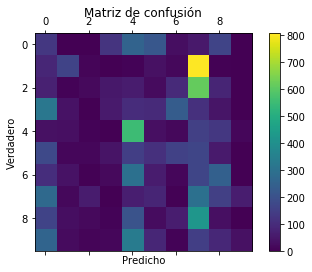

La accuracy antes de entrenar es 0.141
Función de pérdidad:


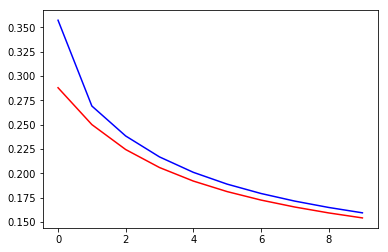

Accuracy:


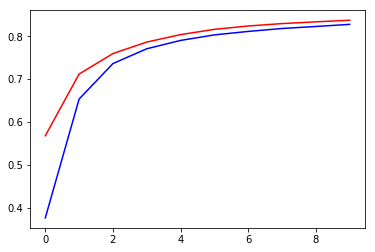

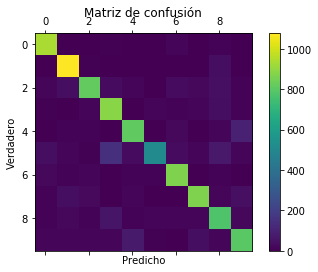

La accuracy después de entrenar es 0.8372


In [15]:
from sklearn.metrics import accuracy_score as acc

def show_confusion_matrix_nl(cm):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Matriz de confusión')
    fig.colorbar(cax)
    plt.xlabel('Predicho')
    plt.ylabel('Verdadero')
    plt.show()

#Inicializo la entrada como un vector de tamaño size
i = Input(shape=(size,)) 
#Inicializo una capa densa, activación sigmoide y entrada i
#Para inicializar la capa densa se usa la API funcional de keras
d = Dense(10, activation='sigmoid')(i) 
#Inicializo el modelo a partir de sus entradas y salidas
model = Model(inputs=i, outputs=d)
#Compilo el modelo con la función de pedidad y utilizando 
#Stocastic Gradiant Descent como optimizador (una variante del Gradient Descent)
#metrics no es necesario, pero permite usar otra función de error para la validación
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])
#Muestro la esturctura del perceptrón
model.summary()
#Me quedo con la mayor predicción
predict = lambda x: np.argmax(model.predict(x), axis=-1)

show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy antes de entrenar es {}'.format(acc(y_test, predict(x_test))))
#Entreno y guardo el historial del errores en h. 
#verbose: 0: sin salida, 1: salida detallada, 2: salida solo al final del epoch
h = model.fit(x_train, to_categorical(y_train), 
              batch_size=100, epochs=10, 
              validation_data=(x_test, to_categorical(y_test)), verbose=0)

print('Función de pérdidad:')
plt.plot(h.history['loss'], 'b-', h.history['val_loss'], 'r-')
plt.show()
print('Accuracy:')
plt.plot(h.history['categorical_accuracy'], 'b-', h.history['val_categorical_accuracy'], 'r-')
plt.show()

show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy después de entrenar es {}'.format(acc(y_test, predict(x_test))))

## Competencias entre clases
Uno de los problemas más grandes que tiene la versión de arriba es que no hay competencia entre las clases. Si agregamos información de que una imagen no puede pertenecer a dos clases, se puede mejorar el clasificador. Para esto, utilizamos una función de activación conocida como softmax:

$$Softmax(\bar{z})_{i}=\frac{e^{z_{i}}}{\sum e^{z_{j}}} $$

Como resultado de utilizar la función, la suma de las probabilidades para una instancia es 1.
Además, se cambia la función de error a la entropía cruzada categórica

$$CC(Y, \hat{Y})=-{\sum Y \circ log(\hat{Y})} $$

Donde $y$ es una matriz de la cantidad de instancias por la cantidad de clases. En cada fila tiene un uno para la clase correspondiente a la instancia y ceros en todos los demás elementos. $\hat{Y}$ es una matriz de las mismas dimensiones, es la salida del clasificador. Y $\circ$ es el producto elemento a elemento, conocido como producto de Hadamard.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


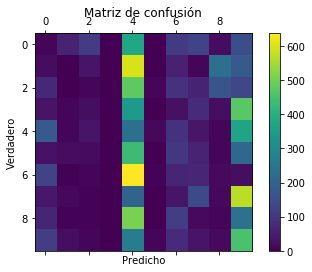

La accuracy antes de entrenar es 0.093
Función de pérdidad:


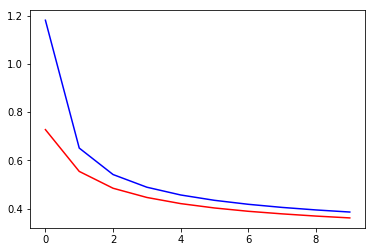

Accuracy:


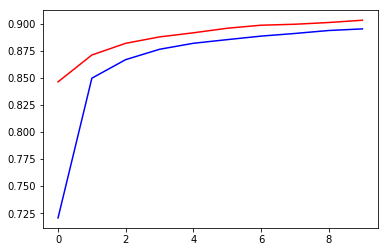

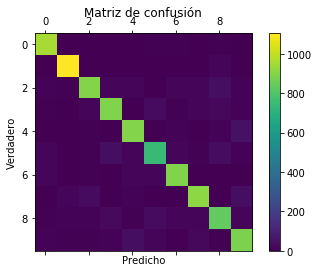

La accuracy después de entrenar es 0.9032


In [16]:
#Inicializo la entrada como un vector de tamaño size
i = Input(shape=(size,)) 
#Inicializo una capa densa, activación sigmoide y entrada i
#Para inicializar la capa densa se usa la API funcional de keras
d = Dense(10, activation='softmax')(i) 
#Inicializo el modelo a partir de sus entradas y salidas
model = Model(inputs=i, outputs=d)
#Compilo el modelo con la función de pedidad y utilizando 
#Stocastic Gradiant Descent como optimizador (una variante del Gradient Descent)
#metrics no es necesario, pero permite usar otra función de error para la validación
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])
#Muestro la esturctura del perceptrón
model.summary()

show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy antes de entrenar es {}'.format(acc(y_test, predict(x_test))))
#Entreno y guardo el historial del errores en h. 
#verbose: 0: sin salida, 1: salida detallada, 2: salida solo al final del epoch
h = model.fit(x_train, to_categorical(y_train), 
              batch_size=100, epochs=10, 
              validation_data=(x_test, to_categorical(y_test)), verbose=0)

print('Función de pérdidad:')
plt.plot(h.history['loss'], 'b-', h.history['val_loss'], 'r-')
plt.show()
print('Accuracy:')
plt.plot(h.history['categorical_accuracy'], 'b-', h.history['val_categorical_accuracy'], 'r-')
plt.show()


show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy después de entrenar es {}'.format(acc(y_test, predict(x_test))))

Hasta aquí, se puede observar que funciones lineales tienen una buena capacidad de predicción. Si vemos los resultados, en el $90\%$ de los casos la clasificación fue correcta. Como el dataset es balanceado, es decir, tiene la misma cantidad de instancias de cada clase podemos decir que tanto un clasificador aleatorio o un clasificador de clase mayoritaria obtienen, en promedio, clasificarían correctamente el $90\%$ de los casos.

## Red Neuronal Profunda

Uno de los tipos redes neuronales profundas consisten en apilar varios de estos clasificadores. Estas se suelen llamar *Deep Feedforward Networks* y su expresión matemática es:

$$L1(X)=act_1(X \cdot W_1 + \bar{b}_1)$$
$$L2(L1(X)=act_2(L1(X) \cdot W_2 + \bar{b}_2)$$
$$L3(L2(L1(X)))=act_3(L2(L1(X)) \cdot W_3 + \bar{b}_3)$$
$$...$$
$$Ln(...L3(L2(L1(X))...)=act_n(Ln(...(L3((L1(X))...) \cdot W_n + \bar{b}_n)$$

El concepto es que $L1$ extraiga características lineales de los datos, $L2$ cuadráticas, y así hasta que $L_n$ haga la predicción. $act_i$ es lo que se denomina función de activación, generalmente se suelen usar:
* **Sigmoide**: acotada entre $(0,1)$, con su valor medio en $s(0)=0.5$
* **Tanh**: Similar a la sigmoide, pero acotada entre $(-1, 1)$
* **Lineal o identidad**: una función que retorna el valor de entrada $f(x)=x$
* **Relu (Rectified Linear Unit)**: función lineal si $x > 0$, sino es contante en $0$

![Red Neuronal](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8b/Neural_network_bottleneck_achitecture.svg/800px-Neural_network_bottleneck_achitecture.svg.png)

Fuente: [Wikimedia](https://commons.wikimedia.org/wiki/File:Neural_network_bottleneck_achitecture.svg)


**NOTA:** Si bien está probado que una red con 3 capas puede aprender cualquier función, no se sabe como determinar el número necesario de unidades o características que la capa intermedia debe aprender. Además, son difíciles de entrenar con métodos basados en el gradiente, ya que son muy sensibles a los cambios.

**NOTA 2:** Las funciones de activación Relu y Lineal son preferidas a para las capas intermedias, ya que tiende facilitar el entrenamiento. Funciones como la sigmoide o tanh, pueden tener gradientes pequeños que se pierden por la limitación en la representación de los números flotantes. Esto se conoce como ***vanishing gradient problem***.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


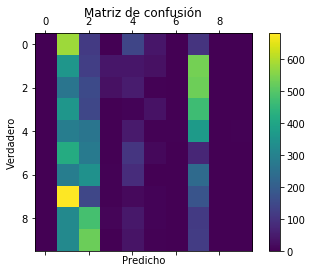

La accuracy antes de entrenar es 0.0754
Función de pérdidad:


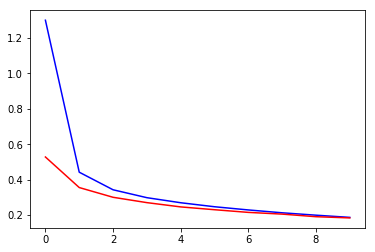

Accuracy:


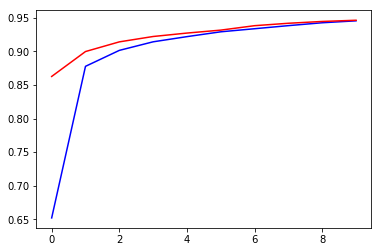

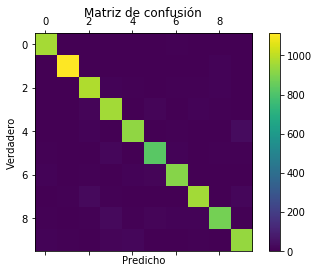

La accuracy después de entrenar es 0.9464


In [17]:
#Inicializo la entrada como un vector de tamaño size
i = Input(shape=(size,)) 
#Inicializo una capa densa, activación sigmoide y entrada i
#Para inicializar la capa densa se usa la API funcional de keras
d = Dense(100, activation='relu')(i)
d = Dense(100, activation='relu')(d)
d = Dense(100, activation='relu')(d)
d = Dense(10, activation='softmax')(d) 
#Inicializo el modelo a partir de sus entradas y salidas
model = Model(inputs=i, outputs=d)
#Compilo el modelo con la función de pedidad y utilizando 
#Stocastic Gradiant Descent como optimizador (una variante del Gradient Descent)
#metrics no es necesario, pero permite usar otra función de error para la validación
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])
#Muestro la esturctura del perceptrón
model.summary()

show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy antes de entrenar es {}'.format(acc(y_test, predict(x_test))))
#Entreno y guardo el historial del errores en h. 
#verbose: 0: sin salida, 1: salida detallada, 2: salida solo al final del epoch
h = model.fit(x_train, to_categorical(y_train), 
              batch_size=100, epochs=10, 
              validation_data=(x_test, to_categorical(y_test)), verbose=0)

print('Función de pérdidad:')
plt.plot(h.history['loss'], 'b-', h.history['val_loss'], 'r-')
plt.show()
print('Accuracy:')
plt.plot(h.history['categorical_accuracy'], 'b-', h.history['val_categorical_accuracy'], 'r-')
plt.show()


show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy después de entrenar es {}'.format(acc(y_test, predict(x_test))))

Con una red con cerca de 100000 parámetros se llega a una taza de error de menos del $6\%$ en la clasificación.

Hasta aquí hemos visto que:

![ML comici](https://imgs.xkcd.com/comics/machine_learning.png)

Fuente [xkcd](https://xkcd.com/1838/)

## Redes convolucionales

Las redes convolucionales, o CNN (Convolutional Neural Network), son un tipo especializado de redes neuronales que han sido aplicado con mucho éxito en problemas en cuales los datos tienen forma de grillas, como son las imágenes. Este éxito es atribuido a que las características de una imagen tienen un fuerte principio de localidad. Por ejemplo, la existencia de un borde puede ser determinada mirando solo los pixeles cercanos al mismo verificando si existe una variación súbita de colores. Se las conocen como redes convolucionales ya que aplican una operación matemática conocida como convolución. La convolución no es más que un operador móvil que se aplica repetidamente sobre los datos de entrada. Este operador está definido por una matriz pequeña, generalmente llamada kernel, que se aplica repetidamente sobre la imagen. Por ejemplo, imaginemos un kernel de 2 X 2.

$$K=\left[\begin{array}{cc}
k_{1,1} & k_{1,2}\\
k_{2,1} & k_{2,2}
\end{array}\right]$$

y una imagen de n X m:

$$I=\left[\begin{array}{cc}
i_{1,1} & i_{1,2} & ... & i_{1, m}\\
i_{2,1} & i_{2,2} & ... & i_{2, m}\\
... & ... & ... & ... \\
i_{n,1} & i_{n,2} & ... & i_{n, m}\\
\end{array}\right]$$

el resultado de aplicar la convolución sería:

$$C=\left[\begin{array}{cc}
c_{1,1} & c_{1,2} & ... & c_{1, m-1}\\
c_{2,1} & c_{2,2} & ... & c_{2, m-1}\\
... & ... & ... & ... \\
c_{n-1,1} & c_{n-1,2} & ... & c_{n-1, m-1}\\
\end{array}\right]$$

donde:

$$c_{i, j} = i_{i, j} * k_{1,1} + i_{i, j+1} * k_{1,2} + i_{i+1, j} * k_{2,1} + i_{i+1, j+2} * k_{2,2}$$

La operación de convolución ha sido usada con mucho éxito en procesamiento de imágenes para detección de bordes, mejoramiento de imágenes, aplicación de blur, etc. Por ejemplo, Kirsch[1] propuso en 1971 una técnica que permite detectar estructuras en las imágenes. Para esto, utiliza distintas [matrices de convolución](https://en.wikipedia.org/wiki/Kirsch_operator). Para ilustrar el la convolución utilizaremos $g^{(1)}$.

$$g^{(1)}=\left[\begin{array}{cc}
5 & 5 & 5 \\
-3 & 0 & -3 \\
-3 & -3 & -3
\end{array}\right]$$

[1] Kirsch, R. (1971). "[Computer determination of the constituent structure of biological images](https://www.sciencedirect.com/science/article/pii/0010480971900346)". Computers and Biomedical Research. 4: 315–328. doi:10.1016/0010-4809(71)90034-6.

In [18]:
!pip install tqdm
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
from keras.layers import Input, Dense, Conv2D, Flatten
from keras.models import Model 
from keras.utils import to_categorical
from keras import backend as K
from imageio import imread
from tqdm import tqdm
import os.path
while not os.path.exists('movediza.jpg'):
    #Si no está el archivo hay que subirlo. Solo para Google Colab!!
    from google.colab import files
    uploaded = files.upload()
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

(480, 640, 3)


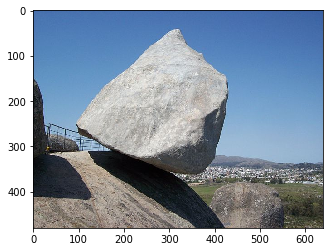

In [19]:
#Cargo una imagen.
movediza = imread('movediza.jpg')
print(movediza.shape)
plt.imshow(movediza)
plt.show()

A continuación, se presenta una implementación en Python de un filtro convolucional para ilustrar su funcionamiento.

100%|██████████| 478/478 [01:12<00:00,  6.90it/s]


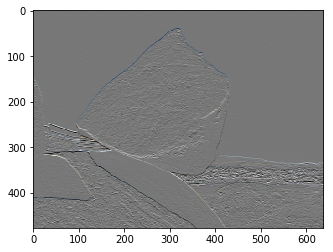

In [20]:
#Cargo la matriz
kirsch_matrix = [[5, 5, 5], 
                [-3, 0, -3],
                [-3, -3, -3]]
kirsch_matrix = np.asarray(kirsch_matrix, dtype=np.float32) 
#Inicializo el placeholder como una matriz con garbage
movediza_k1 = np.empty((movediza.shape[0]-2, movediza.shape[1]-2, 3))
#Convolucion por fila, por columna, 
for i in tqdm(range(0, movediza.shape[0]-2)): #tqdm muestra la barra de progreso
    for j in range(0, movediza.shape[1]-2):
        #Trato los canales de forma independiente
        for c in range(3): 
            # El operador * multiplica la matriz elemento a elemento y luego la
            # reduzco con una suma
            movediza_k1[i, j, c] = np.sum(movediza[i:i+3, j:j+3, c] * kirsch_matrix)
# Normalizo la imagen para poder mostrarla
movediza_k1 = (movediza_k1 - np.min(movediza_k1))/(np.max(movediza_k1) - np.min(movediza_k1))
plt.imshow(movediza_k1)
plt.show()

### Keras
La implementación anterior es lenta debido a que no se encuentra adecuadamente vectorizada y que Python es un lenguaje interpretado. 

Los frameworks para Deep Learning, incluido Keras, proveen soporte para las capas convolucionales. Estas convoluciones son más genéricas que la convolución del ejemplo. En el ejemplo se considera cada canal (color) por separar, pero en las redes convolucionales también se opera entre los canales de la imagen. Además, la salida de la convolución puede tener una cantidad distinta de canales a la entrada. Los canales de salida se los suele llamar filtros, ya que representan un filtro convolucional particular. 
En el caso de Keras, el kernel de una convolución tiene la forma de `(alto, ancho, canales_entrada, canales_salida)`.

Si queremos replicar el ejemplo anterior con Keras, podemos hacer que cada filtro se corresponda con cada y que los valores en un filtro $i$ para un canal $j$ es $0$ si $i \neq j$, y el valor correspondiente al filtro Kirsch en otro caso.

```
kernel = np.zeros((3, 3, 3, 3))
for i in range(3):
    kernel[:, :, i, i] = kirsch_kernel
```

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 3)     81        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Forma de los parámetros de la convolución: (3, 3, 3, 3)


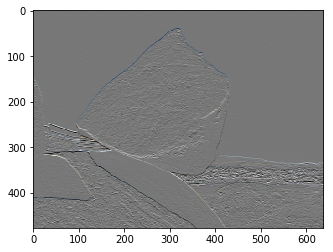

In [21]:
# De entrada tengo una matriz de 3 dimensiones, las primeras dos
# son de tamaño variable
i = Input(shape=(None, None, 3)) 
# Agrego una capa convolucional de 2 dimensiones
d = Conv2D(3, (3,3), activation='linear', use_bias=False)(i)
# Creo el modelo
kirsch = Model(inputs=i, outputs=d)
kirsch.summary()
# Compilo el modelo. No importa el loss ni optimizer.
kirsch.compile(loss='categorical_crossentropy', optimizer='sgd')
print('Forma de los parámetros de la convolución: {}'.format(kirsch.layers[1].kernel.shape))
# Cargo la matrix en un kernel apropiado
kirsch_kernel = np.zeros((3, 3, 3, 3))
for i in range(3):
    kirsch_kernel[:, :, i, i] = kirsch_matrix
# Utilizo el backend para cargar el kernel construido.
K.set_value(kirsch.layers[1].kernel, kirsch_kernel)
# Aplico la convolución.
movediza_k2 = kirsch.predict(np.asarray([movediza]))[0]
# Normalizo la imagen para poder mostrarla
movediza_k2 = (movediza_k2 - np.min(movediza_k2))/(np.max(movediza_k2) - np.min(movediza_k2))
plt.imshow(movediza_k2)
plt.show()

Dado que las capas convolucionales presentan funciones derivables en todos sus parámetros, es posible calcular su gradiente. Por este motivo, podemos utilizarlas, junto a las funciones de activación, para definir una red neuronal. 

![Red Convolucional](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/800px-Typical_cnn.png)

Fuente: [Wikipedia Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network)

Ejemplos de cómo extraen características pueden observarse en:

* [An Interactive Node-Link Visualization of Convolutional Neural Networks](http://scs.ryerson.ca/~aharley/vis/)
* [CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/)




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 5)         130       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 5)         630       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 5)         630       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 10)        1260      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1440)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                14410     
Total para

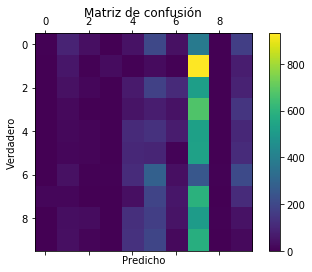

La accuracy antes de entrenar es 0.0946
Función de pérdidad:


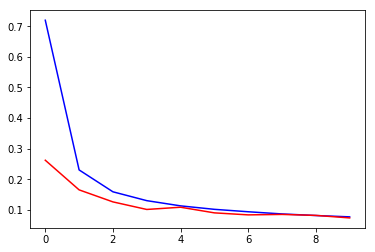

Accuracy:


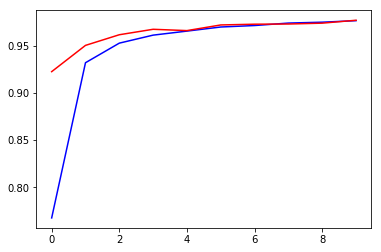

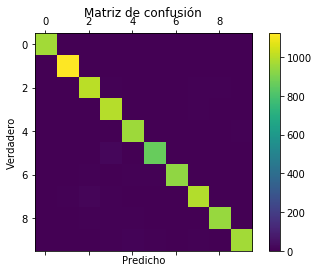

La accuracy después de entrenar es 0.9773


In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train.shape = (60000, 28, 28)
x_train = np.expand_dims(x_train / 255, axis=-1)
x_test = np.expand_dims(x_test / 255, axis=-1)

#x_train.shape = (60000, 28, 28, 1)
i = Input(shape=(x_train.shape[1], x_train.shape[2], 1))
d = Conv2D(5, (5,5), activation='relu')(i)
d = Conv2D(5, (5,5), activation='relu')(d)
d = Conv2D(5, (5,5), activation='relu')(d)
d = Conv2D(10, (5,5), activation='relu')(d)
d = Flatten()(d)
d = Dense(10, activation='softmax')(d)
model = Model(inputs=i, outputs=d)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])

show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy antes de entrenar es {}'.format(acc(y_test, predict(x_test))))

h = model.fit(x_train, to_categorical(y_train), epochs=10, batch_size=100, 
              validation_data=(x_test, to_categorical(y_test)), verbose=0)

print('Función de pérdidad:')
plt.plot(h.history['loss'], 'b-', h.history['val_loss'], 'r-')
plt.show()
print('Accuracy:')
plt.plot(h.history['categorical_accuracy'], 'b-', h.history['val_categorical_accuracy'], 'r-')
plt.show()

show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy después de entrenar es {}'.format(acc(y_test, predict(x_test))))

De la prueba, se puede observar dos cosas importentes:
1. Las redes convolucionales tienen menos parámetros que una totalmente conectada.
1. Obtuvo mejores resultados.

Tener menos parámetros es una ventaja por partida doble. Primero, al haber menos parámetros es más fácil realizar la computación ya que se requiere menos memoria RAM/RAM de GPU para almacenar la red. Segundo, al haber menos parámetros, estos tienen menos posibilidades de especializarse en características particulares del conjunto de entrenamiento. Por lo que se requieren menos datos para entrenar la red y esta generaliza mejor a datos nuevos.

Por otro lado, también se pueden mejorar los resultados cambiando otros hiper-parámetros, como la forma de optimizar. Por ejemplo, Nadam que incluye en la fórmula de actualización de los pesos elementos como cuanto varían los gradientes o si la variación es sostenida en el tiempo.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 5)         130       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 5)         630       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 5)         630       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 10)        1260      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1440)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                14410     
Total para

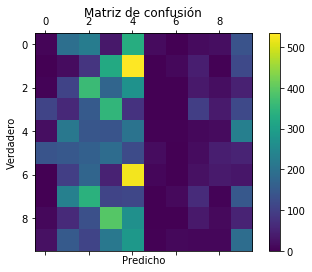

La accuracy antes de entrenar es 0.1228
Función de pérdidad:


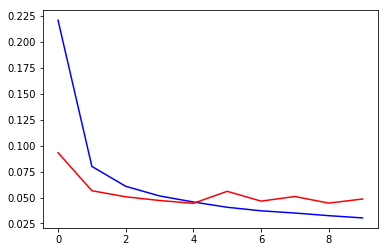

Accuracy:


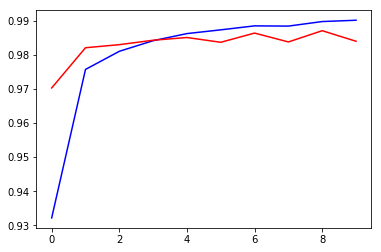

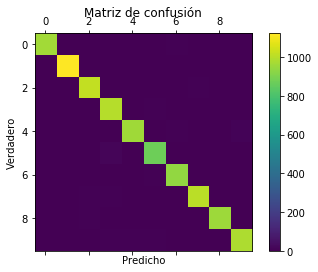

La accuracy después de entrenar es 0.984


In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train / 255, axis=-1)
x_test = np.expand_dims(x_test / 255, axis=-1)


i = Input(shape=(x_train.shape[1], x_train.shape[2], 1))
d = Conv2D(5, (5,5), activation='relu')(i)
d = Conv2D(5, (5,5), activation='relu')(d)
d = Conv2D(5, (5,5), activation='relu')(d)
d = Conv2D(10, (5,5), activation='relu')(d)
d = Flatten()(d)
d = Dense(10, activation='softmax')(d)
model = Model(inputs=i, outputs=d)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['categorical_accuracy'])

show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy antes de entrenar es {}'.format(acc(y_test, predict(x_test))))

h = model.fit(x_train, to_categorical(y_train), epochs=10, batch_size=100, 
              validation_data=(x_test, to_categorical(y_test)), verbose=0)

print('Función de pérdidad:')
plt.plot(h.history['loss'], 'b-', h.history['val_loss'], 'r-')
plt.show()
print('Accuracy:')
plt.plot(h.history['categorical_accuracy'], 'b-', h.history['val_categorical_accuracy'], 'r-')
plt.show()

show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy después de entrenar es {}'.format(acc(y_test, predict(x_test))))

# Transfer learning


Trasnfer learning es otra manera de utilizar las técnicas de Deep Learning. Se utiliza en casos donde los datos de entrenamiento son escasos, pero se tiene modelos entrenados para tareas similares. Para ejemplificar, utilizaremos el dataset conocido como [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html).


| Propiedad | Valor |
| --- | --- |
| Clases | 10 |
| Tamaño de las imágenes | 32 X 32  |
| Canales de las imágenes | 3 (RGB)  |
| Instancias de entrenamiento | 50.000 |
| Instancias de testeo | 10.000 |
| Valor mínimo de cada pixel | 0 |
| Valor máximo de cada pixel | 255 |

El dataset contiene imágenes en color de 32 X 32 pixeles divididas en 10 clases:
1. Avión
1. Auto										
1. Pájaro									
1. Gato							
1. Venado										
1. Perro						
1. Rana									
1. Caballo										
1. Barco							
1. Camión



100 primeros elementos del conjunto de entrenamiento


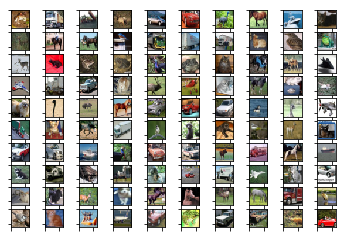

In [24]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('100 primeros elementos del conjunto de entrenamiento')
f = plt.figure(111)
for i in range(10):
    for j in range(10):
        ax = f.add_subplot(10, 10, i + j*10 + 1)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        ax.imshow(x_train[i + j*10, :, :], cmap='gray')
plt.show()

x_train = x_train / 255
x_test = x_test / 255

Si utilizamos una CNN con una arquitectura similar a del ejemplo anterior, obtenemos un accuracy del $52\%$ aproximadamente.

**IMPORTANTE:** por cuestiones de tiempo de entrenamiento, se usa la misma arquitectura utilizada en el ejemplo de MNIST, pero se pueden lograr mejores resultados. En el [ejemplo de Keras](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py) la red puede alcanzar un accuracy del $79\%$. 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 5)         380       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 5)         630       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 20, 20, 5)         630       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 10)        1260      
_________________________________________________________________
flatten_3 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                25610     
Total para

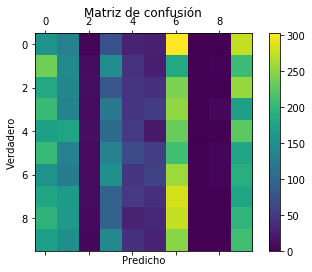

La accuracy antes de entrenar es 0.1005
Función de pérdidad:


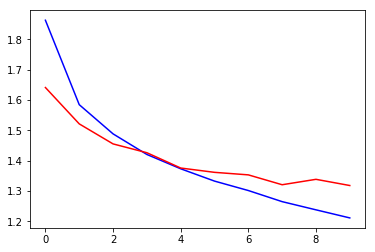

Accuracy:


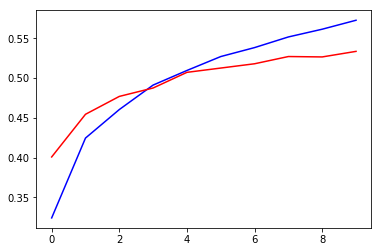

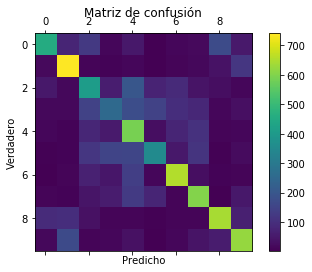

La accuracy después de entrenar es 0.5336


In [25]:
from keras.layers import GaussianNoise
i = Input(shape=(32, 32, 3))
d = Conv2D(5, (5,5), activation='relu')(i)
d = Conv2D(5, (5,5), activation='relu')(d)
d = Conv2D(5, (5,5), activation='relu')(d)
d = Conv2D(10, (5,5), activation='relu')(d)
d = Flatten()(d)
d = Dense(10, activation='softmax')(d)
model = Model(inputs=i, outputs=d)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['categorical_accuracy'])

show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy antes de entrenar es {}'.format(acc(y_test, predict(x_test))))

h = model.fit(x_train, to_categorical(y_train), epochs=10, batch_size=100, 
              validation_data=(x_test, to_categorical(y_test)), verbose=0)


print('Función de pérdidad:')
plt.plot(h.history['loss'], 'b-', h.history['val_loss'], 'r-')
plt.show()
print('Accuracy:')
plt.plot(h.history['categorical_accuracy'], 'b-', h.history['val_categorical_accuracy'], 'r-')
plt.show()

show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy después de entrenar es {}'.format(acc(y_test, predict(x_test))))

Supongamos que tenemos solo una porción de datos para entrenar, por ejemplo 2000 imágenes (200 por cada clases). ¿Sería posible entrenar la red neuronal?

In [26]:
sample_per_class = 200

x_small = np.empty((sample_per_class * 10, 32, 32, 3))
y_small = np.empty((sample_per_class * 10,))


counter = [0] * 10

i = 0
for x, y in zip(x_train, y_train):
    if counter[y[0]] == sample_per_class:
      continue
    counter[y[0]] += 1
    x_small[i, :, :, :] = x
    y_small[i] = y
    i += 1
    if i == sample_per_class * 10: 
        break
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 5)         380       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 5)         630       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 20, 20, 5)         630       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 10)        1260      
_________________________________________________________________
flatten_4 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                25610     
Total para

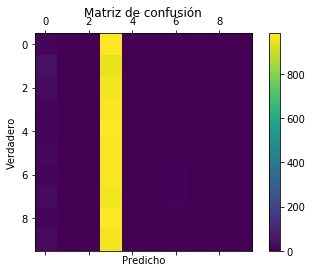

La accuracy antes de entrenar es 0.1001
Función de pérdidad:


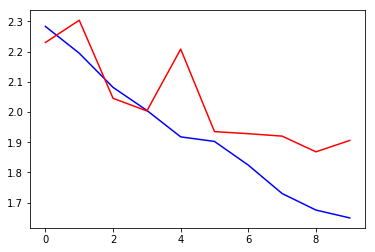

Accuracy:


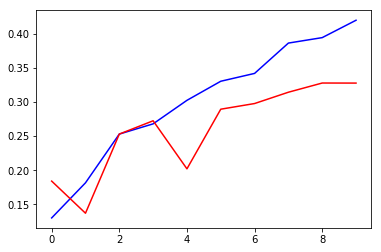

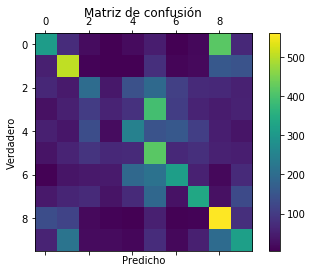

La accuracy después de entrenar es 0.3278


In [27]:
i = Input(shape=(32, 32, 3))
d = Conv2D(5, (5,5), activation='relu')(i)
d = Conv2D(5, (5,5), activation='relu')(d)
d = Conv2D(5, (5,5), activation='relu')(d)
d = Conv2D(10, (5,5), activation='relu')(d)
d = Flatten()(d)
d = Dense(10, activation='softmax')(d)
model = Model(inputs=i, outputs=d)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['categorical_accuracy'])

show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy antes de entrenar es {}'.format(acc(y_test, predict(x_test))))

h = model.fit(x_small, to_categorical(y_small), epochs=10, batch_size=100, 
              validation_data=(x_test, to_categorical(y_test)), verbose=0)


print('Función de pérdidad:')
plt.plot(h.history['loss'], 'b-', h.history['val_loss'], 'r-')
plt.show()
print('Accuracy:')
plt.plot(h.history['categorical_accuracy'], 'b-', h.history['val_categorical_accuracy'], 'r-')
plt.show()

show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy después de entrenar es {}'.format(acc(y_test, predict(x_test))))

En el gráfico de accuracy podemos ver que la red aprende muy bien a identificar los ejemplos de entrenamiento. Llega a un accuracy del $40\%$, pero cuando hacemos la evaluación con el conjunto de test, el valor es del $30\%$. Este fenómeno se conoce como *overfitting* y es un problema importante cuando se usa este tipo de técnicas con pocos datos.

Para este tipo de problemas se utiliza el *transfer learning*. Para esto, se debe considerad alguna red neuronal arbitraría entrenada para clasificar imágenes con un dataset grande. Hay muchas disponibles públicamente. Keras provee varias [redes preentrenadas](https://keras.io/applications/) con el dataset de [ImageNet](http://www.image-net.org/), más de 14 millones de imágenes con 1000 clases. Por ser una arquictura simple, podemos tomar VGG16 que tiene más de **138 millones de parámetros**. A continuación, se puede observar la arquitectura de la red.

In [28]:
from keras.applications.vgg16 import VGG16
model = VGG16(include_top=True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Si consideramos que las capas ocultas aprenden las características de las imágenes, podemos separar la red en dos partes:

1. Desde la capa de `Input` hasta la capa `block5_pool` como un extractor de características.
2. Las capas `fc1` y `fc2` como un clasificador. 

Si nos quedamos con la primera parte podemos tener un extractor de características para imágenes genéricas:

In [29]:
#El modelo es pesado y no queremos que se rompa por falta de memoria en la GPU
del model 
#Ahora si, sin el tope!!
model = VGG16(include_top=False)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

Por comparación vamos a crear 2 dataset nuevos:


1. **x_small_t** y **x_test_t**: dataset small transformado con el modelo VGG16.
2. **x_small_f** y **x_test_f**: dataset small con forma cambiada para que cada pixel de la imagen sea un valor en un vector.



In [30]:
#Dataset de transfer learning
x_small_t = model.predict(x_small)
#Esto hace las veces de flatten
x_small_t = np.reshape(x_small_t, (x_small.shape[0], 512))
print('Forma del dataset transformado con VGG16 {}'.format(x_small_t.shape))
#Test set
x_test_t = model.predict(x_test)
x_test_t = np.reshape(x_test_t, (x_test.shape[0], 512))


#Dataset de imagenes
x_small_f = np.reshape(x_small, (x_small.shape[0], 32 * 32 * 3))
print('Forma del dataset original {}'.format(x_small_f.shape))
x_test_f = np.reshape(x_test, (x_test.shape[0], 32 * 32 * 3))

Forma del dataset transformado con VGG16 (2000, 512)
Forma del dataset original (2000, 3072)


Podemos probar los dos tipos de características con una regresión logística:

In [31]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
#Los parámetros son para evitar warnings, estandades hasta la versión 0.22
mt = LogisticRegression(solver='liblinear', multi_class='ovr')
mf = LogisticRegression(solver='liblinear', multi_class='ovr')

print('Entrenando Transfer')
mt.fit(x_small_t, y_small)
print('Entrenando Full')
mf.fit(x_small_f, y_small)

print('Accuracy: {}'.format(acc(y_test, mt.predict(x_test_t))))
print('Accuracy: {}'.format(acc(y_test, mf.predict(x_test_f))))

Entrenando Trasnfer
Entrenando Full
Accuracy: 0.5066
Accuracy: 0.2887


Podemos observar que las características transferidas tienen una mejor performance que usar los pixeles de forma cruda.

## Fine Tuning

Otro uso de las redes preentrenadas para extraer características es incorporarlas en otras redes neuronales para acelerar su entrenamiento. Por ejemplo, en el siguiente caso se utiliza la VGG16 como una capa inicial en una red neuronal. Para que esto funcione, es necesario que las modificaciones en los pesos más sutil que cuando se entrena una red de cero, ya que se supone que la mayoría de los pesos ya están cerca de un valor óptimo. En consecuencia, podemos cambiar el **learning rate** del optimizador, en este caso **Stocastic Gradiant Descent**, de $0.01$ a $0.001$, es decir un orden de magnitud menor.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 14,982,474
Trainable params: 14,982,474
Non-trainable params: 0
_________________________________________________________________


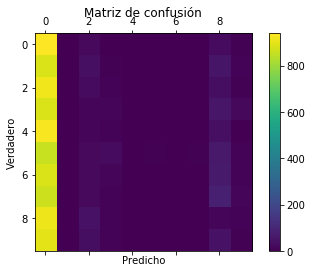

La accuracy antes de entrenar es 0.1016
Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 113s 2ms/step - loss: 1.4874 - categorical_accuracy: 0.4804 - val_loss: 1.3213 - val_categorical_accuracy: 0.5523
Epoch 2/4
50000/50000 [==============================] - 109s 2ms/step - loss: 0.9338 - categorical_accuracy: 0.6748 - val_loss: 0.8327 - val_categorical_accuracy: 0.7058
Epoch 3/4
50000/50000 [==============================] - 109s 2ms/step - loss: 0.7975 - categorical_accuracy: 0.7221 - val_loss: 0.8203 - val_categorical_accuracy: 0.7162
Epoch 4/4
50000/50000 [==============================] - 109s 2ms/step - loss: 0.7177 - categorical_accuracy: 0.7499 - val_loss: 0.7380 - val_categorical_accuracy: 0.7419
Función de pérdidad:


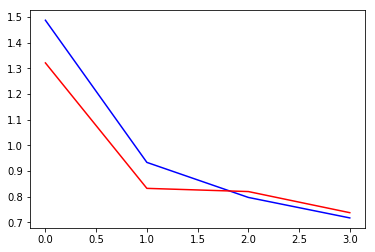

Accuracy:


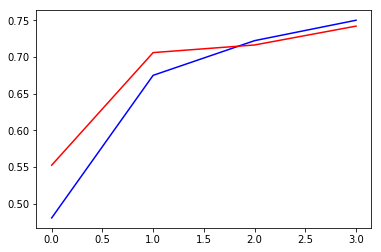

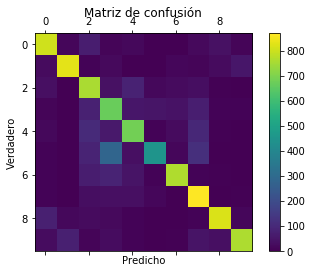

La accuracy después de entrenar es 0.742


In [32]:
from keras.optimizers import SGD


i = Input((32, 32, 3))
model = VGG16(include_top=False)(i)

d = Flatten()(model)
d = Dense(512, activation='relu')(d)
d = Dense(10, activation='softmax')(d)
model = Model(inputs=i, outputs=d)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer= \
              SGD(lr=1e-3, momentum=0.0, decay=0.0, nesterov=False), \
              metrics=['categorical_accuracy'])#1e-4:ok y 30 epocs

show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy antes de entrenar es {}'.format(acc(y_test, predict(x_test))))

h = model.fit(x_train, to_categorical(y_train), epochs=4, batch_size=100, 
              validation_data=(x_test, to_categorical(y_test)), verbose=1)


print('Función de pérdidad:')
plt.plot(h.history['loss'], 'b-', h.history['val_loss'], 'r-')
plt.show()
print('Accuracy:')
plt.plot(h.history['categorical_accuracy'], 'b-', h.history['val_categorical_accuracy'], 'r-')
plt.show()

show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy después de entrenar es {}'.format(acc(y_test, predict(x_test))))

Como se puede observar, rápidamente se llega a una accuracy mayor al $0.73$ en validación. Se podría argumentar que es por la arquitectura y no los pesos preentreandos. Sin embargo, si usamos la misma arquitectura sin los pesos preentreandos no se llega a los mismos resultados.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 14,982,474
Trainable params: 14,982,474
Non-trainable params: 0
_________________________________________________________________


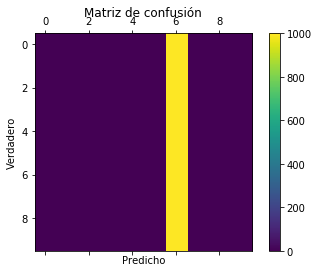

La accuracy antes de entrenar es 0.1
Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 111s 2ms/step - loss: 2.3026 - categorical_accuracy: 0.1097 - val_loss: 2.3025 - val_categorical_accuracy: 0.1036
Epoch 2/4
50000/50000 [==============================] - 109s 2ms/step - loss: 2.3025 - categorical_accuracy: 0.1272 - val_loss: 2.3025 - val_categorical_accuracy: 0.1500
Epoch 3/4
50000/50000 [==============================] - 109s 2ms/step - loss: 2.3025 - categorical_accuracy: 0.1216 - val_loss: 2.3024 - val_categorical_accuracy: 0.1598
Epoch 4/4
50000/50000 [==============================] - 109s 2ms/step - loss: 2.3024 - categorical_accuracy: 0.1458 - val_loss: 2.3024 - val_categorical_accuracy: 0.1550
Función de pérdidad:


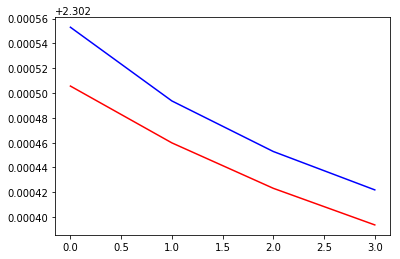

Accuracy:


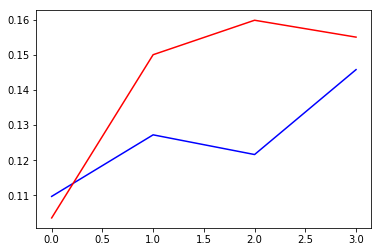

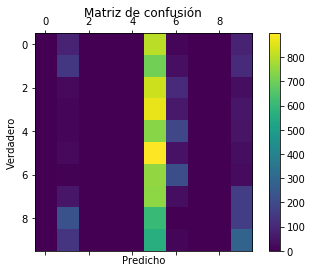

La accuracy después de entrenar es 0.155


In [33]:
i = Input((32, 32, 3))
model = VGG16(include_top=False, weights=None)(i)

d = Flatten()(model)
d = Dense(512, activation='relu')(d)
d = Dense(10, activation='softmax')(d)
model = Model(inputs=i, outputs=d)
model.summary()
model.compile(loss='categorical_crossentropy', \
              optimizer=SGD(lr=1e-3, momentum=0.0, decay=0.0, nesterov=False),\
              metrics=['categorical_accuracy'])

show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy antes de entrenar es {}'.format(acc(y_test, predict(x_test))))

h = model.fit(x_train, to_categorical(y_train), epochs=4, batch_size=100, 
              validation_data=(x_test, to_categorical(y_test)), verbose=1)


print('Función de pérdidad:')
plt.plot(h.history['loss'], 'b-', h.history['val_loss'], 'r-')
plt.show()
print('Accuracy:')
plt.plot(h.history['categorical_accuracy'], 'b-', h.history['val_categorical_accuracy'], 'r-')
plt.show()

show_confusion_matrix_nl(confusion_matrix(y_test, predict(x_test)))
print('La accuracy después de entrenar es {}'.format(acc(y_test, predict(x_test))))

## Conclusiones

![That's not all](https://www.ccbcfamily.org/wp-content/uploads/2018/12/7175_BOB_Spring2019_FINAL.jpg)

Esta charla solo cubrió una pequeña parte de todas las aplicaciones de las redes neuronales y el Deep Learning. Queda mucho por ver, como:


* **Redes Neuronales recurrentes**: para secuencias temporales, por ejemplo, texto.
* **Embeddings**: para características latentes, por ejemplo, palabras (Word2vec, FastText) o recomendación.
* **Capas de ruido**: para disminuir el *overfitting*. Ejemplos: Dropout, Ruido Gausiano.
* **EarlyStoping y reducción del learning rate**: para aprender mejor durante el entrenamiento.
* **Data augmentation**: para incrementar artificialmente la cantidad de datos de entrenamiento.
* **Autoencoders**: para realizar ingeniería de características y data augmentation.
* **GAN**: para generar nuevas instancias de datos a partir de ejemplos previos.
* **...**


